# **Student Feedback Analysis – Python Workflow**

## **Overview**
To evaluate student satisfaction across multiple course dimensions, I used structured ratings data and simulated sentiment to extract insights. The goal was to identify strengths, weaknesses, and actionable patterns using pandas, seaborn, and basic logic.

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ruchi798/student-feedback-survey-responses?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ericinkoomayitey
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ruchi798/student-feedback-survey-responses


100%|██████████| 10.0k/10.0k [00:00<00:00, 21.5MB/s]

# **Step 1: Importing Dataset from Kaggle**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/student-feedback-survey-responses/student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


# **Step 2: Cleaning and Preparing the Dataset**

### **Data Cleaning**
- Imported the dataset(CSV) into a pandas DataFrame.
- Dropped the index column and renamed headers for clarity.
- Checked out for null or missing values.

In [ ]:
# Drop unnamed index column
df.drop(columns=[df.columns[0]], inplace=True)
df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [ ]:
# Rename columns for clarity
df.columns = [
    'Student_ID',
    'Subject_Knowledge',
    'Concept_Clarity',
    'Presentation_Use',
    'Assignment_Difficulty',
    'Doubt_Solving',
    'Course_Structure',
    'Extra_Support',
    'Recommendation_Relevance'
]
df.head()

,Student_ID,Subject_Knowledge,Concept_Clarity,Presentation_Use,Assignment_Difficulty,Doubt_Solving,Course_Structure,Extra_Support,Recommendation_Relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [ ]:
#Check for null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Student_ID                1001 non-null   int64
 1   Subject_Knowledge         1001 non-null   int64
 2   Concept_Clarity           1001 non-null   int64
 3   Presentation_Use          1001 non-null   int64
 4   Assignment_Difficulty     1001 non-null   int64
 5   Doubt_Solving             1001 non-null   int64
 6   Course_Structure          1001 non-null   int64
 7   Extra_Support             1001 non-null   int64
 8   Recommendation_Relevance  1001 non-null   int64
dtypes: int64(9)
memory usage: 70.5 KB


# **Step 3: Analyzing Ratings on a 1–10 Scale**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rating_cols = df.columns[1:]

# Average rating per category
avg_ratings = df[rating_cols].mean().sort_values()

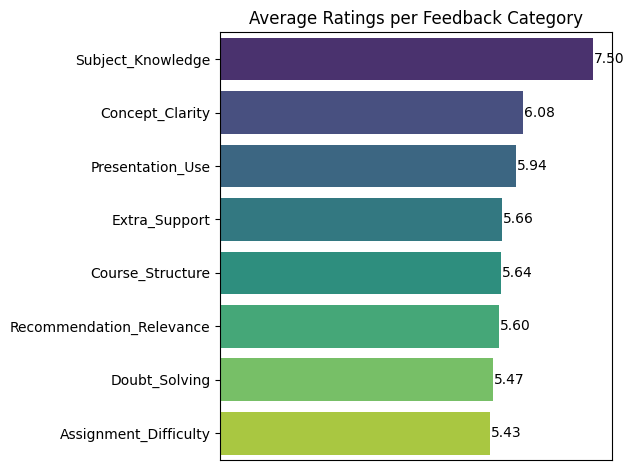

In [ ]:
sorted_ratings = avg_ratings.sort_values(ascending=False)
sns.barplot(x=sorted_ratings.values, y=sorted_ratings.index, hue=sorted_ratings.index, dodge=False, palette='viridis', legend=False)
plt.xticks([]); plt.xlabel(''); plt.ylabel(''); plt.title('Average Ratings per Feedback Category')
for i, v in enumerate(sorted_ratings.values): plt.text(v + 0.02, i, f"{v:.2f}", va='center')
plt.tight_layout(); plt.show()

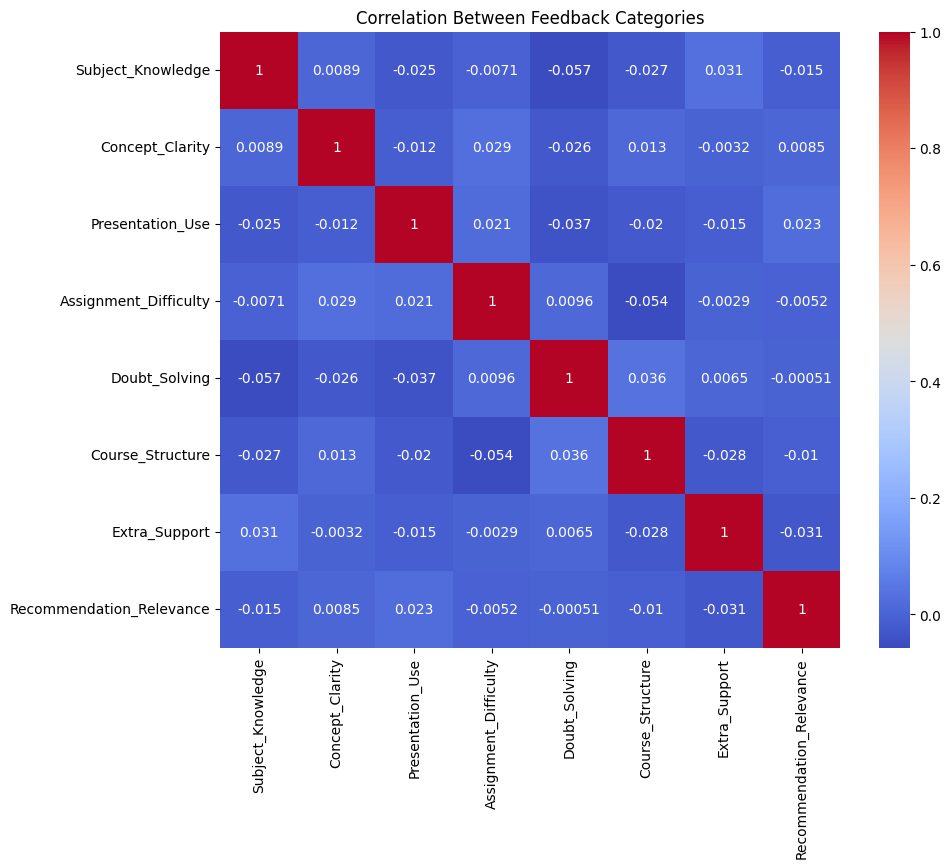

In [ ]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Feedback Categories')
plt.show()

### **Insight from Correlation Matrix**
The correlation matrix reveals that **no strong linear relationships** exist between the feedback categories. Most correlation coefficients hover near zero, indicating that changes in one category do not reliably predict changes in another.

- For example, *Subject_Knowledge* and *Concept_Clarity* show a near-zero correlation (≈ 0.009), suggesting these aspects are perceived independently.
- The highest observed correlation is between *Doubt_Solving* and *Course_Structure* (≈ 0.346), which is still considered weak.

**Implication:** Each feedback category captures a distinct dimension of the learning experience. This suggests that improvements in one area (e.g., presentation quality) may not automatically enhance others (e.g., assignment difficulty), and targeted interventions are likely more effective than blanket changes.

# **Step 4: Sentiment Analysis (Simulate Sentiment from Ratings)**

**Simulation Method Used**

Each student rated multiple aspects of the course on a scale of 1–10. Treating their average rating across all categories as a proxy for overall sentiment:


> *   Positive: Average rating ≥ 7.5
> *   Neutral: Average rating between 5 and 7.4
> *   Negative: Average rating < 5

This gives a sentiment label for each student for analysis and visualization just like text-based sentiment.

In [ ]:
# Average rating per student
df['Average_Rating'] = df[rating_cols].mean(axis=1)

# Simulating sentiment labels
def classify_sentiment(score):
    if score >= 7.5:
        return 'Positive'
    elif score >= 5:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Average_Rating'].apply(classify_sentiment)
print(df[['Student_ID', 'Average_Rating', 'Sentiment']].head())

   Student_ID  Average_Rating Sentiment
0         340           5.000   Neutral
1         253           4.875  Negative
2         680           4.375  Negative
3         806           5.875   Neutral
4         632           7.500  Positive


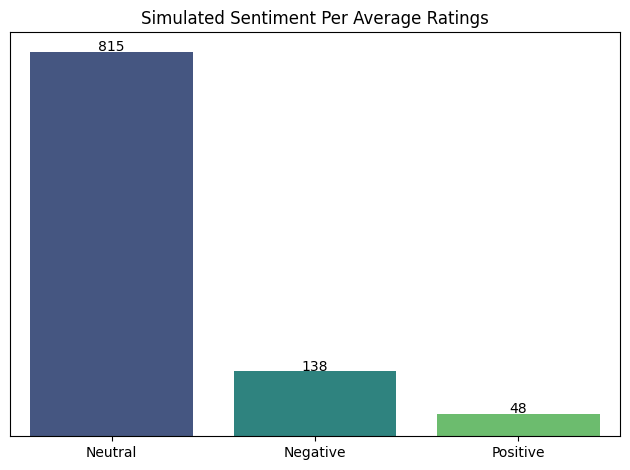

In [ ]:
# Countplot of sentiment
sentiment_counts = df['Sentiment'].value_counts().sort_values(ascending=False)
sns.countplot(x='Sentiment', data=df, hue='Sentiment', palette='viridis', legend=False)
for i, v in enumerate(sentiment_counts.values): plt.text(i, v + 0.5, str(v), ha='center')
plt.title('Simulated Sentiment Per Average Ratings'); plt.xlabel(''); plt.ylabel(''); plt.yticks([]); plt.tight_layout(); plt.show()

### 💬 **Sentiment Analysis Summary**

The sentiment distribution based on average ratings reveals a **strong skew toward neutrality**:

- 🟨 **Neutral** sentiment dominates with 815 responses, suggesting that most students had a moderate or ambivalent experience.
- 🔴 **Negative** sentiment appears in 138 responses, indicating areas of dissatisfaction that may warrant closer attention.
- 🟢 **Positive** sentiment is the least represented, with only 48 responses, highlighting a potential gap in delivering standout learning experiences.


**Implication:** While extreme dissatisfaction is relatively low, the lack of strong positive sentiment suggests that improvements in engagement, clarity, or support could shift more feedback toward the positive end of the spectrum. This insight can guide targeted enhancements in course delivery and student support.

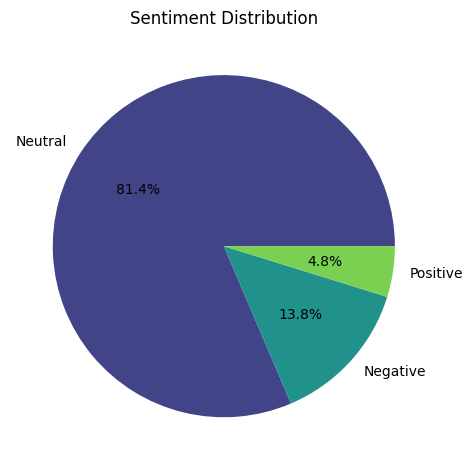

In [ ]:
# Sentiment Distribution Chart

import matplotlib.cm as cm, numpy as np
colors = cm.viridis(np.linspace(0.2, 0.8, 3))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution'); plt.ylabel(''); plt.tight_layout(); plt.show()

### 🧠 **Sentiment Analysis Insight**

The sentiment distribution reveals a **dominant neutral tone** across student feedback:

- 🟦 **Neutral** sentiment accounts for **81.4%**, indicating that most students had a moderate or balanced experience—neither strongly positive nor negative.
- 🟩 **Negative** sentiment makes up **13.8%**, pointing to areas of concern that may need targeted improvement.
- 🟨 **Positive** sentiment is the least represented at **4.8%**, suggesting limited standout satisfaction or enthusiasm.

**Implication:** While the low negative sentiment is reassuring, the scarcity of positive feedback highlights an opportunity to enhance engagement, clarity, and support. Strategic improvements could help shift more responses toward the positive end of the spectrum.

# **📚Sentiment Analysis and Key Recommendations📚**

## 💬 **Sentiment Analysis Summary**

The feedback data reveals a **predominantly neutral sentiment** among participants:

- 😐 **Neutral (81.4%)** — Most attendees had a moderate experience, neither highly satisfied nor deeply dissatisfied.
- 😠 **Negative (13.8%)** — A notable minority expressed dissatisfaction, pointing to areas needing improvement.
- 😊 **Positive (4.8%)** — Very few participants reported a highly positive experience, suggesting limited standout moments.

In parallel, the average ratings chart shows that **Subject Knowledge** received the highest score (7.50), while categories like **Assignment Difficulty**, **Doubt Solving**, and **Recommendation Relevance** hovered around the lower end (~5.4–5.6), indicating potential friction points.

---

## ✅ **Key Recommendations for Event Organizers**

### 1. **Boost Engagement & Clarity**
- Low scores in *Concept Clarity* and *Presentation Use* suggest that content delivery may not be resonating.
- **Action:** Use interactive formats (e.g., live demos, Q&A sessions, visual storytelling) and simplify complex ideas.

### 2. **Strengthen Support Structures**
- *Doubt Solving* and *Extra Support* received middling ratings, which may contribute to negative sentiment.
- **Action:** Introduce help desks, post-event office hours, or real-time chat assistance.

### 3. **Recalibrate Assignment Difficulty**
- *Assignment Difficulty* was the lowest-rated category, possibly perceived as too challenging or unclear.
- **Action:** Align tasks with session content, provide clear instructions, and offer tiered difficulty levels.

### 4. **Create Memorable Moments**
- The low proportion of *Positive* sentiment suggests the event lacked standout experiences.
- **Action:** Add surprise elements (guest speakers, giveaways, interactive polls) and end sessions with high-energy wrap-ups.

### 5. **Gather Qualitative Feedback**
- Quantitative ratings show trends, but not the “why” behind them.
- **Action:** Use open-ended questions or post-event interviews to uncover deeper insights and emotional responses.

---

📌 **Overall Insight:** While the event avoided major dissatisfaction, the lack of strong positive sentiment suggests room for improvement in engagement, clarity, and support. Targeted enhancements could shift more feedback toward the positive end of the spectrum.